## Chris Compierchio - Compier1

Python Assignment 3: the cores of stars 
==========================================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text and execute all of the sections of Python code.

## Introduction

In this problem, you will examine the typical densities $\rho_c$, pressures $P_c$, and temperatures $T_c$ in the cores of stars. How do these depend on mass? What processes dominate the pressure?

The file AppendixG.dat is from C&O, and gives stellar data. Copy and rename the file (click on the empty box beside the filename in your syzygy directory, click 'Duplicate' in the options at top left, then click on the empty box beside the duplicated file and click 'Rename' in the options at the top left). Edit the file to keep only the masses and radii for main-sequence stars of spectral type B0, A0, F0, the Sun, K0, and M0. Note that you could also do this before uploading the file to syzygy! Next read in the file using numpy's genfromtxt() function (we use this instead of loadtxt, as you used before, since one column has text rather than numbers):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

%matplotlib inline

# Read in the data - here we are only using columns 0, 3, and 4, and are telling genfromtxt to omit the first 3 rows
# Unpack tells genfromtxt to load the columns in your text file into 1-D arrays
# Edit the filename to whatever you named your file. 
specType, R, M = np.genfromtxt('AppendixG.dat', skip_header=3, unpack=True, usecols=(0,3,4), dtype='str')

# We read everything in as a string but we want to convert R and M to float:
R = R.astype(np.float)
M = M.astype(np.float)

# Check your values. Note that R in this dataset is R/R_sun, and M is M/M_sun! 
print(R)

[6.7  2.2  1.4  1.   0.93 0.63]


In this assignment we will investigate the behaviour of the central gas density, $\rho_c$, pressure, $P_c$, and temperature, $T_c$, of stars on the main sequence. First look up the values for the Sun in C&O Chapter 11.1, and add them here, with units. Use whichever units you are most comfortable with. 

In [2]:
### Question 1
sun_rho = (1.527*10**5)*u.kg/u.m**-3
sun_tc = (1.570*10**7)*u.K
sun_pc = (2.342*10**16)*u.N/u.m**-2

Next we will estimate values of $\rho$, $T_c$ and $P_c$ for the other stars using scaling relations (assuming the structure of all main-sequence stars is the same). With this notebook you should submit a pdf showing how you derived your scaling relations. 

Start with the equation of hydrostatic equilibrium to determine how $P_c$ scales with $M$ and $R$. 

### Question 2a
Write your scaling here in Markdown:
$P_c \propto M^2/R^4$ 

[2.56955499e+24 6.06996660e+24 1.12670145e+25 1.69075636e+25
 1.41059850e+25 2.79163853e+25]


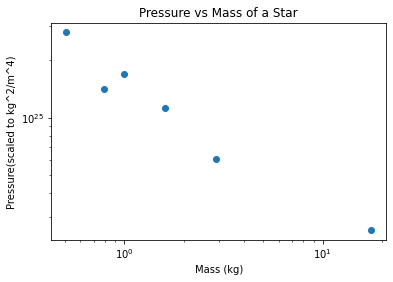

In [3]:
### Question 2b

# Use your scaling relation and values for the Sun to calculate P_c for the other stellar types in your table. 
# Remember that the values for M and R are given in units of the solar mass and radius:
pc = (M*(1.989*10**30))**2/(R*(6.955*10**8))**4
print(pc)

# Plot your results against M. Use logarithmic axes. Do not connect your data points - i.e., use plt.scatter()
# rather than plt.plot(). Label your axes! 
# If you don't recall how to set up your plot, look back at the first two python assignments. 

fig = plt.figure(), plt.xlabel("Mass (kg)"), plt.ylabel("Pressure(scaled to kg^2/m^4)"), 
plt.title("Pressure vs Mass of a Star")
fig = plt.scatter(M,pc), plt.yscale("log"), plt.xscale("log")


Next, find a scaling relation for $T_c$ in terms of $M$ and $R$ for stars like our Sun. Again, show your work in an attached file. 

### Question 3a
Write your scaling here: $T_c \propto M^2/R$

[2.60000227e+53 2.17443158e+52 1.04012219e+52 5.68816822e+51
 3.81718902e+51 2.34840088e+51]


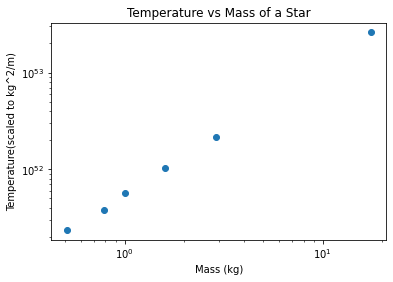

In [4]:
### Question 3b
# Use your scaling relation and values for the Sun to calculate T_C for the other stellar types in your table:
tc = (M*(1.989*10**30))**2/((R*(6.955*10**8)))
print(tc)

# Plot your results against M.  Use logarithmic axes. Do not connect your data points - i.e., use plt.scatter()
# rather than plt.plot(). Label your axes! 
# If you don't recall how to set up your plot, look back at the first two python assignments. 

fig = plt.figure(), plt.xlabel("Mass (kg)"), plt.ylabel("Temperature(scaled to kg^2/m)"), 
plt.title("Temperature vs Mass of a Star")
fig = plt.scatter(M, tc)
fig = plt.yscale("log")
fig = plt.xscale("log")

### Question 4a
Next, write a scaling for the density $\rho$ (no need to overthink this one!):

$\rho \propto M/R^3$

[  343.99887377  1610.17594982  3447.30140016  5912.12190127
  5806.59620293 12058.46168779]


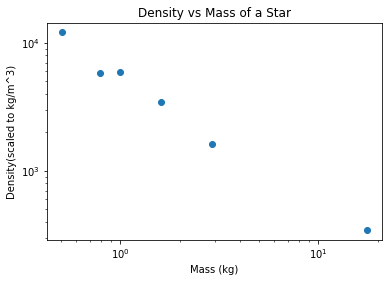

In [5]:
### Question 4b
# Use your scaling relation and values for the Sun to calculate rho for the other stellar types in your table:
rho =(M*(1.989*10**30))/((R*(6.955*10**8))**3)
print(rho)

# Plot your results against M.  Use logarithmic axes. Do not connect your data points - i.e., use plt.scatter()
# rather than plt.plot(). Label your axes! 
# If you don't recall how to set up your plot, look back at the first two python assignments. 

fig = plt.figure(), plt.xlabel("Mass (kg)"), plt.ylabel("Density(scaled to kg/m^3)"), plt.title("Density vs Mass of a Star")
fig = plt.scatter(M, rho)
fig = plt.yscale("log")
fig = plt.xscale("log")

Next we will use the values from your table to estimate how $R$ scales with $M$ (i.e., assuming $R \propto M^\alpha$, what is $\alpha$?). Here, first graph $R$ as a function of $M$ using logarithmic axes, so the dependence is a straight line. 

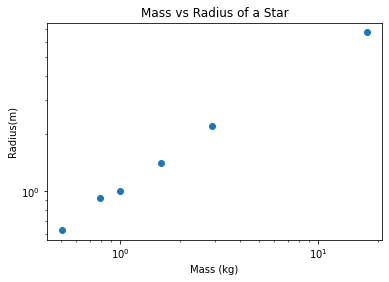

In [6]:
### Question 5a
# Plot M vs R from your table. Use logarithmic axes. Do not connect your data points - i.e., use plt.scatter()
# rather than plt.plot(). Label your axes! 
# If you don't recall how to set up your plot, look back at the first two python assignments. 

fig = plt.figure(), plt.xlabel("Mass (kg)"), plt.ylabel("Radius(m)"), 
plt.title("Mass vs Radius of a Star")

fig = plt.scatter(M, R)
fig = plt.yscale("log")
fig = plt.xscale("log")

Next, we want to fit the data with a straight line. The simplest way to do this is via a linear regression, using the least squares method. 

For a short video and explanation of how to do this in python, see [this link](https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570). Then try your own fit in the box below:

In [7]:
### Question 5b
# Following the above website or your own method, perform the linear regression and print your resulting slope 
# and intercept for the data above. Remember you are fitting a straight line to log(R/R_sun) vs. log(M/M_sun). 
# In python, log(x) = np.log10(x)

x_mean = np.mean(np.log(M))
y_mean = np.mean(np.log(R))

num = 0
den = 0

for i in range(len(R)):
    num += (np.log(M[i]) - x_mean)*(np.log(R[i]) - y_mean)
    den += (np.log(M[i]) - x_mean)**2
    
slope = num/den
intercept = y_mean - slope*x_mean

print (slope, intercept)

0.6628154116954939 0.030105220672072053


In [8]:
### Question 5c
# There are also simple functions to perform the same analysis. Here's one, which you can use to check your math. 
# Be sure to edit 'X' and 'Y'
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(M),np.log(R))

print(slope, intercept)

0.6628154116954939 0.030105220672072053


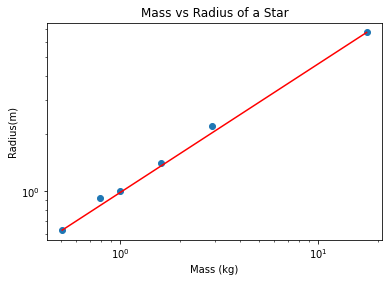

In [9]:
### Question 5d
# Using the equation for a line and your slope & intercept, plot R vs. M from your table again, 
# and add your fitted line:

# Equation for your line
y = slope*M + intercept 

fig = plt.figure(), plt.ylabel("Radius(m)"), plt.xlabel("Mass (kg)"), 
plt.title("Mass vs Radius of a Star")

fig = plt.scatter(M, R)

fig = plt.yscale("log")
fig = plt.xscale("log")

fig = plt.plot([min(M), max(M)], [min(R), max(R)], color='red')

# If you don't have a good fit, go back a step! 

### Question 5e
Given your slope, write your scaling between $M$ and $R$ below:

$R \propto M^.663$

### Question 6

Given your result, how do $\rho_c$, $P_c$, and $T_c$ scale with $M$? Show your work in your attached file, and write your scalings here in Markdown:

$\rho \propto M^-1$ exponent is -1

$P_c \propto M^-4/3$ exponent is -4/3

$T_c \propto M^1/3$ exponent is 1/3


(You can check your work by considering whether your scalings agree with your plots above.)

### Question 7
In example 10.2.1, C\&O show that for the Sun radiation pressure is not important. Given the scalings you derived, for what mass does radiation pressure become important? (If you could not derive the scalings, use the numbers you've calculated above to make a guess). Show your work in an attached file. 

*Bonus: plot the radiation pressure and the central pressure vs. mass for the stellar types in your table in the box below. You can use the value calculated in C&O for the radiation pressure in the Sun.*

<Figure size 432x288 with 0 Axes>

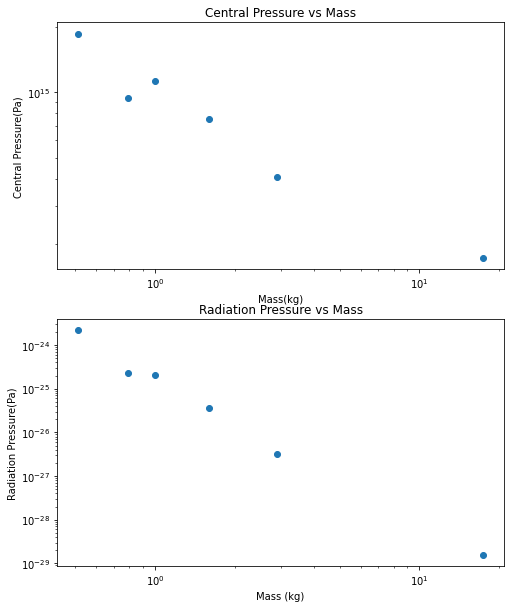

In [10]:
P_central = c.G*((M*(1.989*10**30))**2)/((R*(6.955*10**8))**4)

P_rad = (1/3)*(7.5658**-16)*(((M*(1.989*10**30))**2/((R*(6.955*10**8))**2)**4))

fig1 = plt.figure()

fig1, (plot1, plot2) = plt.subplots(2,1, figsize = (8,10))

plot1.scatter(M, P_central)
plot1.set_title("Central Pressure vs Mass"), plot1.set_xlabel("Mass(kg)"), plot1.set_ylabel("Central Pressure(Pa)")

plot1.set_yscale("log")
plot1.set_xscale("log")

plot2.scatter(M, P_rad)
plot2.set_title("Radiation Pressure vs Mass"), plot2.set_xlabel("Mass (kg)"), plot2.set_ylabel("Radiation Pressure(Pa)")

plot2.set_yscale("log")
plot2.set_xscale("log")

## What to submit

For this assignment, please submit to Quercus a) the pdf of this solved notebook, b) the .ipynb file, c) your edited Appendix G .dat file, and d) a scanned pdf showing your scaling calculations and the answer to Q7. 